In [1]:
# To confirm you have the latest version of PixieDust on your system, run this cell
!pip install --user --upgrade pixiedust

Requirement already up-to-date: pixiedust in /home/engin/anaconda3/envs/py35/lib/python3.5/site-packages (1.1.11)
Requirement not upgraded as not directly required: lxml in /home/engin/anaconda3/envs/py35/lib/python3.5/site-packages (from pixiedust) (4.2.5)
Requirement not upgraded as not directly required: mpld3 in /home/engin/anaconda3/envs/py35/lib/python3.5/site-packages (from pixiedust) (0.3)
Requirement not upgraded as not directly required: colour in /home/engin/anaconda3/envs/py35/lib/python3.5/site-packages (from pixiedust) (0.1.5)
Requirement not upgraded as not directly required: geojson in /home/engin/anaconda3/envs/py35/lib/python3.5/site-packages (from pixiedust) (2.4.0)
Requirement not upgraded as not directly required: astunparse in /home/engin/anaconda3/envs/py35/lib/python3.5/site-packages (from pixiedust) (1.5.0)
Requirement not upgraded as not directly required: markdown in /home/engin/anaconda3/envs/py35/lib/python3.5/site-packages (from pixiedust) (2.6.11)
Require

In [2]:
import pixiedust

Pixiedust database opened successfully


Table SPARK_PACKAGES created successfully


In [4]:
# Build the SQL context required to create a Spark dataframe 
sqlContext=SQLContext(sc) 
# Create the Spark dataframe, passing in some data, and assign it to a variable
df = sqlContext.createDataFrame(
[("Green", 75),
 ("Blue", 25)],
["Colors","%"])


In [ ]:
# display the dataframe above as a pie chart
display(df)

Colors,%
Green,75
Blue,25


In [ ]:
# create another DataFrame, in a new variable
df2 = sqlContext.createDataFrame(
[(2010, 'Camping Equipment', 3),
 (2010, 'Golf Equipment', 1),
 (2010, 'Mountaineering Equipment', 1),
 (2010, 'Outdoor Protection', 2),
 (2010, 'Personal Accessories', 2),
 (2011, 'Camping Equipment', 4),
 (2011, 'Golf Equipment', 5),
 (2011, 'Mountaineering Equipment',2),
 (2011, 'Outdoor Protection', 4),
 (2011, 'Personal Accessories', 2),
 (2012, 'Camping Equipment', 5),
 (2012, 'Golf Equipment', 5),
 (2012, 'Mountaineering Equipment', 3),
 (2012, 'Outdoor Protection', 5),
 (2012, 'Personal Accessories', 3),
 (2013, 'Camping Equipment', 8),
 (2013, 'Golf Equipment', 5),
 (2013, 'Mountaineering Equipment', 3),
 (2013, 'Outdoor Protection', 8),
 (2013, 'Personal Accessories', 4)],
["year","category","unique_customers"])

# This time, we've combined the dataframe and display() call in the same cell
# Run this cell 
display(df2)

year,category,unique_customers
2010,Camping Equipment,3
2010,Golf Equipment,1
2010,Mountaineering Equipment,1
2010,Outdoor Protection,2
2010,Personal Accessories,2
2011,Camping Equipment,4
2011,Golf Equipment,5
2011,Mountaineering Equipment,2
2011,Outdoor Protection,4
2011,Personal Accessories,2


In [ ]:
# load a CSV with pixiedust.sampledata()
df3 = pixiedust.sampleData("https://github.com/ibm-watson-data-lab/open-data/raw/master/cars/cars.csv")
display(df3)

mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
18.0,8,307.0,130,3504,12.0,70,American,chevrolet chevelle malibu
16.0,8,304.0,150,3433,12.0,70,American,amc rebel sst
17.0,8,302.0,140,3449,10.5,70,American,ford torino
15.0,8,429.0,198,4341,10.0,70,American,ford galaxie 500
14.0,8,440.0,215,4312,8.5,70,American,plymouth fury iii
16.0,8,351.0,153,4034,11.0,70,American,ford torino (sw)
15.0,8,360.0,175,3850,11.0,70,American,amc rebel sst (sw)
10.0,8,307.0,200,4376,15.0,70,American,chevy c20
9.0,8,304.0,193,4732,18.5,70,American,hi 1200d
28.0,4,140.0,90,2264,15.5,71,American,chevrolet vega 2300


In [8]:
!pip install --user seaborn

    100% |████████████████████████████████| 215kB 1.2MB/s ta 0:00:01
    100% |████████████████████████████████| 33.1MB 716kB/s ta 0:00:011 8% |██▉                             | 3.0MB 1.1MB/s eta 0:00:28    40% |████████████▉                   | 13.3MB 1.1MB/s eta 0:00:18
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
pixiedust.enableJobMonitor()

Successfully enabled Spark Job Progress Monitor


In [10]:
homes = pixiedust.sampleData("https://openobjectstore.mybluemix.net/misc/milliondollarhomes.csv")

▸,:,


Downloaded 102051 bytes
Creating pySpark DataFrame for 'https://openobjectstore.mybluemix.net/misc/milliondollarhomes.csv'. Please wait...
Loading file using 'SparkSession'


<IPython.core.display.Javascript object>

Successfully created pySpark DataFrame for 'https://openobjectstore.mybluemix.net/misc/milliondollarhomes.csv'


<IPython.core.display.Javascript object>

In [ ]:
display(homes)

PROPERTY TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,LOCATION,SQFT,LOT SIZE,YEAR BUILT,DAYS ON MARKET,URL,SOURCE,LISTING ID,LATITUDE,LONGITUDE
Single Family Residential,25 Marshall Rd,Wellesley,MA,2482,1909847,5.0,4.5,Wellesley,4900.0,12228.0,2016.0,71.0,http://www.redfin.com/MA/Wellesley/25-Marshall-Rd-02482/home/105557102,MLS PIN,61782463.0,42.2997542,-71.3088256
Condo/Co-op,983 Memorial Dr #302,Cambridge,MA,2138,1100000,3.0,2.0,Harvard Square,1606.0,nan,1920.0,74.0,http://www.redfin.com/MA/Cambridge/983-Memorial-Dr-02138/unit-302/home/105594755,MLS PIN,61690710.0,42.3722656,-71.1252212
Condo/Co-op,341 Marlborough St #4,Boston,MA,2116,3005000,3.0,3.0,Back Bay,1618.0,nan,1900.0,67.0,http://www.redfin.com/MA/Boston/341-Marlborough-St-02115/unit-4/home/56787595,MLS PIN,61970237.0,42.351212,-71.085754
Condo/Co-op,485-495 Harrison Ave #401,Boston,MA,2118,1390000,2.0,2.0,South End,1409.0,nan,1914.0,67.0,http://www.redfin.com/MA/Boston/495-Harrison-Ave-02118/unit-401/home/108978383,MLS PIN,61691728.0,42.3417737,-71.0667754
Single Family Residential,Lot 1 Monsen Rd,Concord,MA,1742,1454900,4.0,4.5,Monsen Farm,4555.0,21509.0,2015.0,58.0,http://www.redfin.com/MA/Concord/1-Monsen-Rd-01742/home/102153489,MLS PIN,51940855.0,42.4693342,-71.3266466
Condo/Co-op,183 Massachusetts Ave #803,Boston,MA,2115,1082500,2.0,2.0,Back Bay,1220.0,nan,2002.0,74.0,http://www.redfin.com/MA/Boston/183-Massachusetts-Ave-02115/unit-803/home/12402725,MLS PIN,62071287.0,42.3455392,-71.0871356
Townhouse,31 Day St Unit B,Somerville,MA,2144,1351000,3.0,3.0,Davis Square,1874.0,nan,2012.0,88.0,http://www.redfin.com/MA/Somerville/31-Day-St-02144/unit-B/home/40314152,MLS PIN,61798074.0,42.3951863,-71.1242988
Single Family Residential,217 Forest St,Winchester,MA,1890,1155000,4.0,3.5,Muraco School District,3779.0,9234.0,2013.0,72.0,http://www.redfin.com/MA/Winchester/217-Forest-St-01890/home/110057079,MLS PIN,56198065.0,42.4714541,-71.1156268
Single Family Residential,1 Denny St,Westborough,MA,1581,1100000,6.0,3.5,Westborough,3394.0,239580.0,1917.0,79.0,http://www.redfin.com/MA/Westborough/1-Denny-St-01581/home/16634032,MLS PIN,60054100.0,42.259306,-71.611866
Townhouse,7 Marlborough St #1,Boston,MA,2116,2570000,3.0,3.5,Back Bay,2179.0,2179.0,1900.0,88.0,http://www.redfin.com/MA/Boston/7-Marlborough-St-02116/unit-1/home/9299190,MLS PIN,59800618.0,42.354279,-71.072681



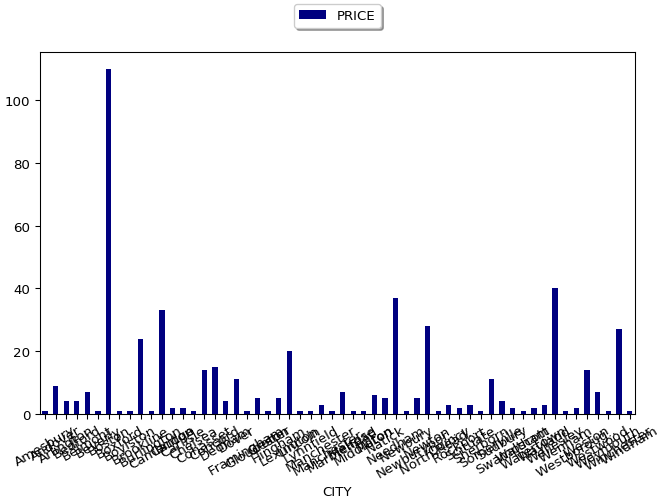

In [ ]:
display(homes)

Write a visualization

In [13]:
import pixiedust

▸,:,


In [14]:
sqlContext=SQLContext(sc)
d1 = sqlContext.createDataFrame(
[(2010, 'Camping Equipment', 3),
 (2010, 'Golf Equipment', 1),
 (2010, 'Mountaineering Equipment', 1),
 (2010, 'Outdoor Protection', 2),
 (2010, 'Personal Accessories', 2),
 (2011, 'Camping Equipment', 4),
 (2011, 'Golf Equipment', 5),
 (2011, 'Mountaineering Equipment',2),
 (2011, 'Outdoor Protection', 4),
 (2011, 'Personal Accessories', 2),
 (2012, 'Camping Equipment', 5),
 (2012, 'Golf Equipment', 5),
 (2012, 'Mountaineering Equipment', 3),
 (2012, 'Outdoor Protection', 5),
 (2012, 'Personal Accessories', 3),
 (2013, 'Camping Equipment', 8),
 (2013, 'Golf Equipment', 5),
 (2013, 'Mountaineering Equipment', 3),
 (2013, 'Outdoor Protection', 8),
 (2013, 'Personal Accessories', 4)],
["year","zone","unique_customers"])

▸,:,


In [15]:
from pixiedust.display.display import *

class TestDisplay(Display):
    def doRender(self, handlerId):
        self._addHTMLTemplateString(
"""
NewSample Plugin
<table class="table table-striped">
    <thead>                 
        {%for field in entity.schema.fields%}
        <th>{{field.name}}</th>
        {%endfor%}
    </thead>
    <tbody>
        {%for row in entity.take(100)%}
        <tr>
            {%for field in entity.schema.fields%}
            <td>{{row[field.name]}}</td>
            {%endfor%}
        </tr>
        {%endfor%}
    </tbody>
</table>
"""
        )

@PixiedustDisplay()
class TestPluginMeta(DisplayHandlerMeta):
    @addId
    def getMenuInfo(self,entity,dataHandler):
        if entity.__class__.__name__ == "DataFrame":
            return [
                {"categoryId": "Table", "title": "NewSample Table", "icon": "fa-table", "id": "newsampleTest"}
            ]
        else:
            return []
    def newDisplayHandler(self,options,entity):
        return TestDisplay(options,entity)


▸,:,


In [ ]:
display(d1)

year,zone,unique_customers
2010,Camping Equipment,3
2010,Golf Equipment,1
2010,Mountaineering Equipment,1
2010,Outdoor Protection,2
2010,Personal Accessories,2
2011,Camping Equipment,4
2011,Golf Equipment,5
2011,Mountaineering Equipment,2
2011,Outdoor Protection,4
2011,Personal Accessories,2
